$\textbf{Visibility Equation}$


For this work, we simulate a HERA core antenna array,  with antennas closely packed  located at the PAPER site, Karoo South Africa.  We simulate true sky visibility for point sources seen by a baseline $\mathbf{b}_{\textit{a}\textit{b}}$ at frequency $\nu$:
$$
\begin{equation}
\textit{u}(\mathbf{b}_{\textit{a}\textit{b}},\nu)= \sum_{\textit{q}=1}^{\textit{N}_{\textrm{src}}} \textit{A}_{\textit{a}}^*(\hat{\mathbf{s}}_{\textit{q}},\nu)  \textit{A}_{\textit{b}}(\hat{\mathbf{s}}_{\textit{q}},\nu) \textit{S}_{\textit{q}}(\nu/\nu_0)^{-\alpha_{\textit{q}}} \textit{e}^{-2\pi j\frac{\nu}{\textit{c}}\mathbf{b}_{\textit{a}\textit{b}}\cdot \hat{\mathbf{s}}_{\textit{q}}}
\end{equation}
$$
where  $\textit{A}_{\textit{a}}(\hat{\mathbf{s}}_{\textit{q}},\nu)$ and $\textit{A}_{\textit{b}}(\hat{\mathbf{s}}_{\textit{q}},\nu)$ are primary beam of antenna $\textit{a}$ and $\textit{b}$ measured at a point source location $\hat{\mathbf{s}}_{\textit{q}}$  with flux density $\textit{S}_{\textit{q}}$. Here $\nu_0$ and $\alpha_{\textit{q}}$ are the central frequency and spectral index of each point source. $^*$ complex conjugate and $j=\sqrt{-1}$

And observed visibility:
$$
\begin{equation}
   \textit{v}(\mathbf{b}_{\textit{a}\textit{b}},\nu) = \textit{g}_{\textit{a}}(\nu)^{*}\textit{g}_{\textit{b}} \textit{u}(\mathbf{b}_{\textit{a}\textit{b}},\nu) + \textit{n}_{\textit{a}\textit{b}}(\nu)
\end{equation}
$$
where $\textit{g}_{\textit{a}}$ and $\textit{g}_{\textit{b}}$ are the  directional indpendent eantenna gains. Here $\textit{n}_{\textit{a}\textit{b}}$ is the complex visibility noise, and is given by 
$$
\begin{equation}
  \textit{n}_{\textit{a}\textit{b}}(\nu,\textit{t})=  < \sigma_{\textit{a}}(\nu,\textit{t})\sigma_{\textit{b}}^*(\nu,\textit{t})>
\end{equation}
$$
where $\sigma_{\textit{a}}$ and $\sigma_{\textit{b}}$ are antenna noise defined as 
$$
\begin{equation}\label{eq:radm}
    \sigma(\nu) = \frac{\textit{T}_{\textrm{sys}}(\nu,\textit{t})}{\sqrt{\Delta \nu \Delta \textit{t}}}
\end{equation}
$$
where $\textit{T}_{\textrm{sys}}$ antenna system temperature, and $\Delta \nu$ and $\Delta \textit{t}$ are frequency bandwidth and time integration per observation, respectively.

http://math_research.uct.ac.za/~siphelo/admin/interferometry/3_Positional_Astronomy/3_4_Direction_Cosine_Coordinates.html

In [1]:
%run beam_simulator.py
%run visibility_simulator.py
%matplotlib inline
%run antpos
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy import time
from matplotlib.colors import LogNorm
import scipy.constants as CNST1
from scipy import signal


$\textbf{GLEAM Calague Flux above 15 Jy 100-200 MHz}$

Detail of how/where to download GLEAM Catalogue and data manipulation are discussed in this jupyter notebook:


https://github.com/UKZN-Astronomy/hera_corrcal/blob/master/Simulations/Preparing%20GLEAM%20Source%20Catague.ipynb

In [2]:
#loadinng GLEAM Calague 70-200 MHz
datafile = pd.read_csv('GLEAM_Catalogue_above_1Jy_70_237MHz.csv')

df = pd.DataFrame(data=datafile)

#Flux and spectral indeces best fit

data_bestfit = np.load('GLEAM_Catalogue_flux_above_1Jy_100_200MHz_best_fit_S_0_alpha.npy')

RA = np.deg2rad(df['RAJ2000'])
DEC =np.deg2rad(df['DEJ2000'])

In [3]:
RA

0        6.026567
1        6.194705
2        6.109044
3        6.084446
4        6.199780
5        5.683149
6        5.944603
7        6.125175
8        6.281127
9        6.277142
10       5.704644
11       6.179435
12       5.631111
13       6.102157
14       5.756235
15       6.102388
16       6.196196
17       6.155093
18       5.516391
19       5.952873
20       5.725175
21       5.622969
22       6.268886
23       6.030670
24       5.522893
25       5.627441
26       6.269741
27       6.163199
28       5.644228
29       6.006247
           ...   
17865    3.969395
17866    4.330741
17867    4.566085
17868    4.316215
17869    4.246219
17870    4.604998
17871    4.257392
17872    4.453532
17873    4.224538
17874    4.039545
17875    4.484723
17876    4.002929
17877    4.395658
17878    4.467701
17879    4.390506
17880    4.209374
17881    4.260422
17882    4.391438
17883    4.509178
17884    4.249050
17885    4.386775
17886    4.298831
17887    4.410107
17888    4.375065
17889    4

$\textbf{GLEAM Bright Point Source Spartial Distribution}$

/usr/local/lib/python2.7/dist-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


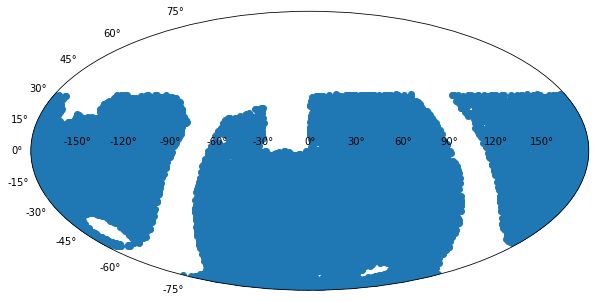

In [3]:
ra = coord.Angle(df['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df['DEJ2000']*u.degree)

RA_0, DEC_0 = 21.41100,-30.72100 #degrees
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)


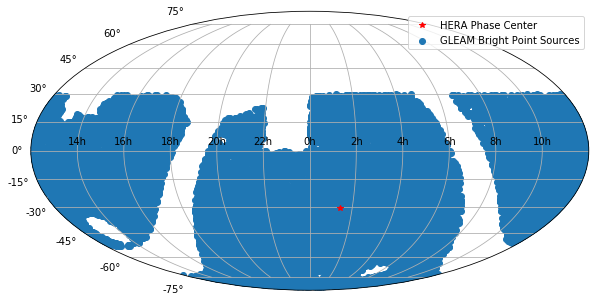

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,label='GLEAM Bright Point Sources')
ax.plot(np.deg2rad(RA_0),np.deg2rad(DEC_0),'*r',label='HERA Phase Center')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.legend(loc='best')
ax.grid(True)

$\textbf{Antenna Layout in ENU System}$

number of Antennas 19


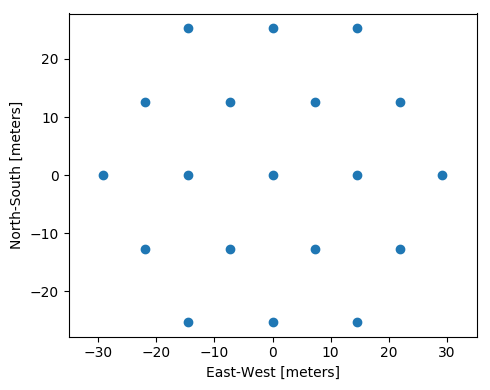

In [51]:
antposs = hex_array(3,split_core= False, outriggers=0)

hera_hex_pos = np.array([list(pos) for pos in antposs.values()])

print 'number of Antennas', len(hera_hex_pos[:,0])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(hera_hex_pos[:,0],hera_hex_pos[:,1])
plt.xlabel("East-West [meters]")
plt.ylabel("North-South [meters]")
plt.axis('equal')
plt.tight_layout()


$\textbf{Transform from ENU to XYZ}$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html

$$
 \begin{gather}
 \begin{bmatrix} X  \\ Y \\ Z \end{bmatrix}
 =
  \begin{bmatrix}
   0 & -\sin(lat) &\cos(lat) \\
  1 & 0 & 0 \\
  0 & \cos(lat) & \sin(lat)
  \end{bmatrix} 
  \begin{bmatrix} E  \\ N \\ U \end{bmatrix}
\end{gather}
$$

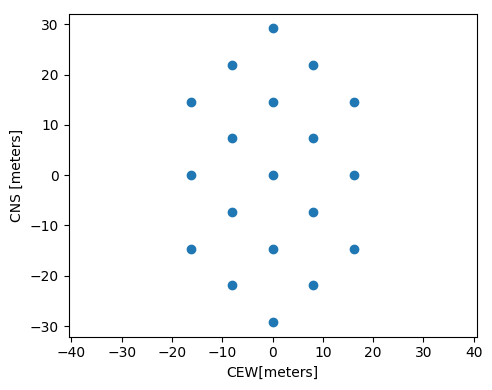

In [53]:
#HERA latitude on Earth Surface
lat = -30.722

XYZ_array = np.array([XYZ_trans_mat(hera_hex_pos[i],lat)[0] for i in range(len(hera_hex_pos))])

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(XYZ_array[:,0],XYZ_array[:,1])
plt.xlabel("CEW[meters]")
plt.ylabel("CNS [meters]")
plt.axis('equal')
plt.tight_layout()




$\textbf{Computing Baseline Vectors}$


With 19 antennas there are 30 unique baselines.
1830 baselines


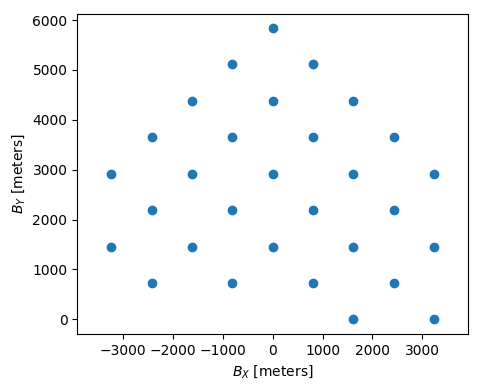

In [55]:


ants_indices = np.arange(len(XYZ_array))

ublDict = InterferometricArray(XYZ_array,ants_indices).CalculateUBLs()[4] #computing Unique Baselines
print 61*60/2 ,"baselines"

B_xyz = np.array(ublDict.keys())

plt.figure(figsize=(5,4), dpi=100)
plt.scatter(B_xyz[:,0],B_xyz[:,1])
plt.xlabel(r"$B_X$ [meters]")
plt.ylabel(r"$B_Y$ [meters]")
plt.axis('equal')
plt.tight_layout()



$$\textbf{Transform from $\textit{B}_{\textrm{XYZ}}$ to $\textit{uvw}$ }$$


For a detailed discussion refer to lecture https://web.njit.edu/~gary/728/Lecture6.html

Below is direction cosine matrix transformation of $\textit{B}_{\textrm{XYZ}}$ to the direction peperndicular to the phase center ($\textit{h}_0,\delta_0$), thus forming $\textit{uvw}$ 

$$
 \begin{gather} 
 \begin{bmatrix} \textit{u}  \\ \textit{v}\\ \textit{w} \end{bmatrix}
 =\frac{1}{\lambda}
  \begin{bmatrix}
   \sin\textit{h}_0 & \cos\textit{h}_0 & 0 \\
  -\sin\delta_0\cos\textit{h}_0 & sin\delta_0\sin\textit{h}_0 & \cos\delta_0 \\
  \cos\delta_0\cos\textit{h}_0 &-\cos\delta_0\sin\textit{h}_0 & \sin\delta_0
  \end{bmatrix} 
  \begin{bmatrix} \textit{B}_{\textit{X}}  \\ \textit{B}_{\textit{Y}} \\ \textit{B}_{\textit{Z}}\end{bmatrix}
\end{gather}
$$

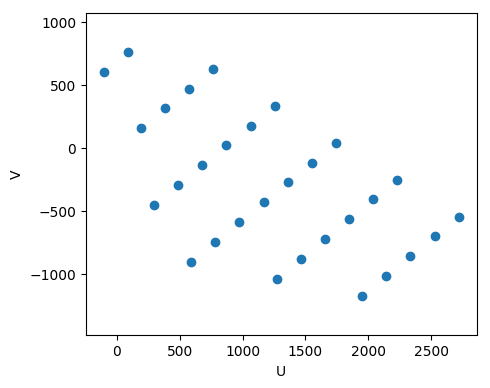

In [57]:
freq_mid =150e6 # Hz
wavelen = 3.0*10**8/freq_mid 
uvw = np.array([baseline_proj(B_xyz[i],RA_0,Dec_0)[0]*1.0/wavelen for i in range(len(B_xyz))])



plt.figure(figsize=(5,4), dpi=100)
plt.scatter(uvw[:,0],uvw[:,1])
plt.xlabel(r"U")
plt.ylabel(r"V")
plt.axis('equal')
plt.tight_layout()


$\textbf{Converting from the equatorial to direction cosine coordinates}$

$$
\begin{equation}
\textit{l}= cos\delta \sin\Delta \textit{h}
\end{equation}
$$
$$
\begin{equation}
\textit{m}= \sin\delta \cos\delta_0 -\cos\delta \sin\delta_0 \cos\Delta \textit{h}
\end{equation}
$$

$$
\begin{equation}
\textit{n} = \sqrt{1-(\textit{l}^2 +\textit{m}^2)}
\end{equation}
$$
where $\textit{l}$, $\textit{m}$ and $\textit{n}$ are direction cosine. Here $(\delta,\textit{h})$ is position on the celestial sphere, and $(\delta_0,\textit{h}_0)$ is phase center of the array, and $\Delta \textit{h} = \textit{h}-\textit{h}_0$.


$\textbf{Equatorial Co-ordinates to local Horizontal Co-ordinates}$



$$
\begin{equation}
\sin(\textrm{altitude}) = \sin(\textrm{latitude})\sin(\delta) + \cos(\textrm{latitude})\cos(\delta)\cos(\textit{h})
\end{equation}
$$
$$
\begin{equation}
\tan(azimuth) = -\frac{\sin\textit{h}}{\cos(\textrm{latitude})\tan\delta  - \sin(\textrm{latitude})  \cos\textit{h}}
\end{equation}
$$

where $\textrm{latitude}$ is position of telescope on Earth. The star hour angle with position ( $(\delta,\textit{h})$ is given by

$$
\begin{equation}
\textrm{SHA} = \textit{LST }-\textit{h}
\end{equation}
$$

where $\textit{LST }$ is the local sidereal time.

$$
\begin{equation}
\textit{h}_{rad}= \frac{\pi}{12}(\textit{h} +\frac{m}{60}+ \frac{s}{3600})
\end{equation}
$$

$$
\begin{equation}
\delta_{rad}=\frac{π}{180}(\textit{d}+ \frac{m_{arcmin}}{60}+\frac{s_{arcsec}}{3600})
\end{equation}
$$

reference:

http://math_research.uct.ac.za/~siphelo/admin/interferometry/3_Positional_Astronomy/3_4_Direction_Cosine_Coordinates.html


http://www.jgiesen.de/elevaz/basics/

http://www.jgiesen.de/astro/astroJS/siderealClock/

In [3]:
def pos_lmn(ra,dec,ra_0,dec_0):
    
    l=np.cos(dec)*np.sin(ra-ra_0)
    m=np.sin(dec)*np.cos(dec_0)-np.cos(dec)*np.sin(dec_0)*np.cos(ra-ra_0)
    n = np.sqrt(1-(l**2 + m**2))
    
    return np.array([l,m,n])

def convert_radec_alt_az(ra,dec,telescope_lat):
    
    alt = np.arcsin(np.sin(telescope_lat)*np.sin(dec) + np.cos(telescope_lat)*np.cos(dec)*np.cos(ra))
    az  = np.arctan(np.sin(ra)/(np.cos(telescope_lat)*np.tan(dec) -np.sin(telescope_lat)*np.cos(ra)))
    return np.array([alt,az])
                    
    
#HERA Phase Center
RA_0,DEC_0 = 21.41100,-30.72100
LST =(np.pi/12.0)*(4.0 + 7.0/60.0 + 40.0/3600)

def cat_poslmn_above_horizon(RA,DEC,RA_0,DEC_0,LST):
    
    src_radec =[]
    src_pos_lmn =[]
    for src_i in range(len(RA)):
        SHA = LST -RA[src_i]
        alt = convert_radec_alt_az(SHA,DEC[src_i],np.deg2rad(DEC_0))[0]
    
        if alt<= 0.0:
            pass
        
        else:
        
            #print src_i, 'above the horizon'
        
            src_pos_lmn.append(pos_lmn(SHA,DEC[src_i],np.deg2rad(RA_0),np.deg2rad(DEC_0)))
            src_radec.append([SHA,DEC[src_i]])
          
            
            
    return [np.array(src_pos_lmn),np.array(src_radec)]
        
    
radec =cat_poslmn_above_horizon(RA,DEC,RA_0,DEC_0,LST)[1]


                    

$\textbf{ Gaussian Primary Beam Model}$

The simplest primary beam model is Gaussain beam, it a good approximation of main lobe. It is a good enough to capture antenna-to-antenna variation due to pointing errors and spectral variation of ful l-width-half-maximum. A two dimensional Gaussian beam centered at ($\theta_c,\phi_c$) and   measure at angular co-ordinate $(\theta,\phi)$
$$
\begin{equation}
        \textit{A}(\theta,\phi,\nu)= \frac{1}{\sqrt{2\pi((\sigma(\nu) + \varepsilon_{\sigma}(\nu))^2}}\textit{e}^{-\frac{(\theta - (\theta_c + \varepsilon_{\theta}))^2 + (\phi+ -(\phi_c\varepsilon_{\phi}))^2}{2(\sigma(\nu) + \varepsilon_{\sigma}(\nu))^2}}
\end{equation}
$$
where $\varepsilon_{\theta}$ and $\varepsilon_{\phi}$ are pointing errors, and $\varepsilon_{\sigma})$ is the beam size/shape error and, is given by
$$
\begin{equation}
\varepsilon_{\sigma}(\nu) = \kappa\sigma(\nu)
\end{equation}
$$
where $\kappa$ is fractional error of the full-width-half-maximum . $\sigma$ is approximated from FWHM of ariy disk, 
$$
\begin{equation}
        \sigma \approx 0.44\frac{\lambda}{\textit{D}}
\end{equation}
$$
. Here $\textit{D}$ dish diameter.

reference

https://courses.lumenlearning.com/austincc-physics2/chapter/27-6-limits-of-resolution-the-rayleigh-criterion/

https://stackoverflow.com/questions/31573572/healpy-from-data-to-healpix-map


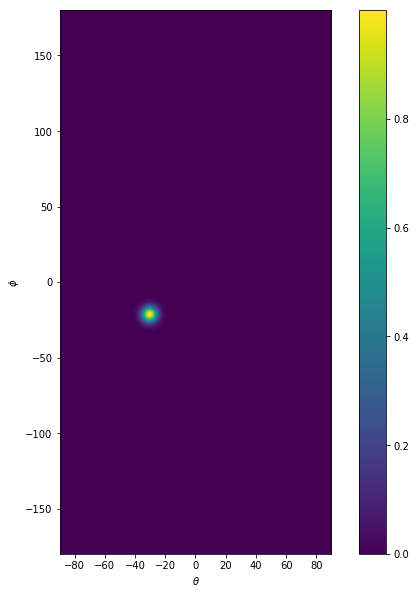

In [5]:
npoints =1000
freq_mid = 150e6
sigma_fwhm = sigma_func(14.0,freq_mid)
RA_0,DEC_0 = 21.41100,-30.72100
theta, phi = np.linspace(-np.pi/2.0,np.pi/2.0,npoints),np.linspace(-np.pi,np.pi,npoints)

gaussin_2d = np.zeros((phi.size,theta.size))
for phi_i in range(len(phi)):
    for theta_j in range(len(theta)):
        
        #print theta_j,phi_i, gaussin_2d[phi_i][theta_j],gaussian_beam(theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        
        gaussin_2d[phi_i][theta_j] = gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),theta[theta_j],phi[phi_i],sigma_fwhm,0.0,0.0,0.0)
        
        
extent = [np.rad2deg(theta[0]),np.rad2deg(theta[-1]),np.rad2deg(phi[0]),np.rad2deg(phi[-1])]      
plt.figure(figsize=(10,10))
plt.imshow(gaussin_2d,extent=extent)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.colorbar()

$\textbf{Visibility Simulation Point Source}$


In [4]:
#Test point source
#We use best fit of central flux at 151 MHz and spectral index
flux_central,spectral_ind = data_bestfit[0][0],data_bestfit[0][1]

print flux_central,spectral_ind

flux_func = lambda f,s_0,alpha : s_0*np.power(151.0/f,alpha)

97.8702559351418 0.4659824453272525


In [6]:
lsts = np.arange(0.0,2.0*np.pi,np.deg2rad(1.0))
freqs = np.arange(100.0,200.0,0.1)


ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
d_block =0.0
#parametized airydisk

a_x = 7.0 #np.random.normal(6.0,0.01)
a_y = 7.0 #np.random.normal(6.0,0.01)



d_diam = 14.0 
ant1_theta_error,ant1_phi_error, ant2_theta_error,ant2_phi_error,Ant1_beam_size_error,Ant2_beam_size_error = 0.0,0.0,0.0,0.0,0.0,0.0

In [12]:

vis_gp =np.zeros((lsts.size,freqs.size),dtype='complex')
vis_ad =np.zeros((lsts.size,freqs.size),dtype='complex')

for lst_i in range(lsts.size):
            #star hour angle
            ra= lsts[lst_i] - ((np.deg2rad(RA_0) +np.pi/2.0))
            
            src_pos_lmn = pos_lmn(ra,np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0))
            
            
            #transforming antenna position from ENU to equatorial system XYZ
            lat = np.deg2rad(DEC_0)
            xyz_1,xyz_2 = XYZ_trans_mat(ant1_pos,lat)[0],XYZ_trans_mat(ant2_pos,lat)[0]
            
            #computing the baseline
            bl_xyz = xyz_2 - xyz_1

            #compute the visibility for all frequency
            vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
            vis_freq_ad = np.zeros(freqs.size,dtype ='complex')
            
            for freq_i in range(freqs.size):
                lambda_ = (3e8)/(freqs[freq_i]*10**6)
                sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
                vis_freq_gp[freq_i]= flux_func(freqs[freq_i],flux_central,spectral_ind)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,sigma_fwhm,0.0,0.0,0.0)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn))
                vis_freq_ad[freq_i]= flux_func(freqs[freq_i],flux_central,spectral_ind)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),np.deg2rad(DEC_0),ra,a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn))
            vis_gp[lst_i,:] = vis_freq_gp
            vis_ad[lst_i,:] = vis_freq_ad
                
 






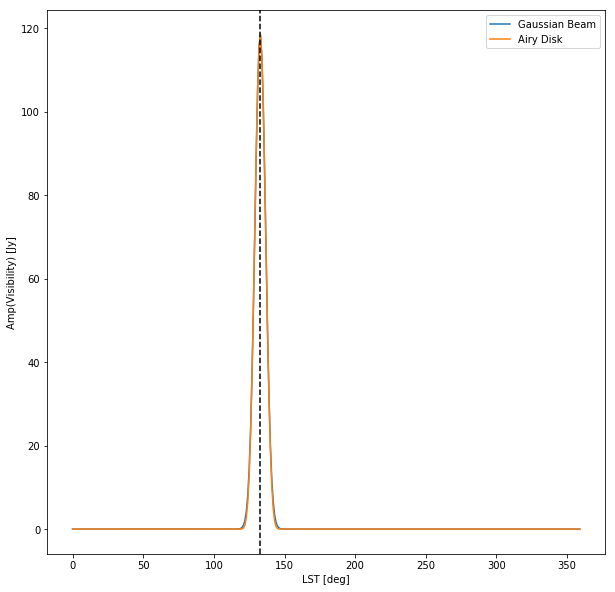

In [16]:

plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.abs(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.abs(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')
                    

2.2719092035961708e-05

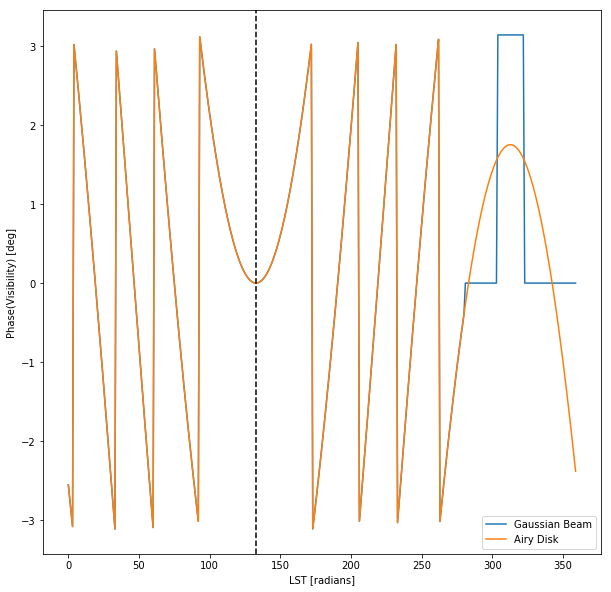

In [17]:
plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.angle(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.angle(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [radians]')
plt.ylabel('Phase(Visibility) [deg]')
plt.legend(loc='best')

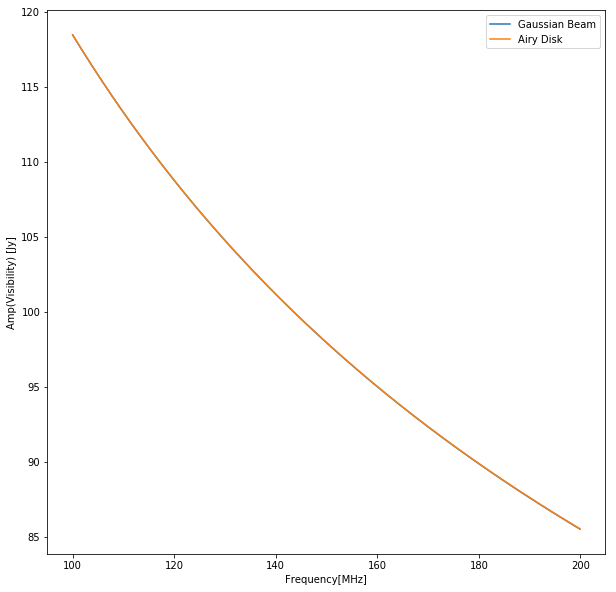

In [20]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.abs(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.abs(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')


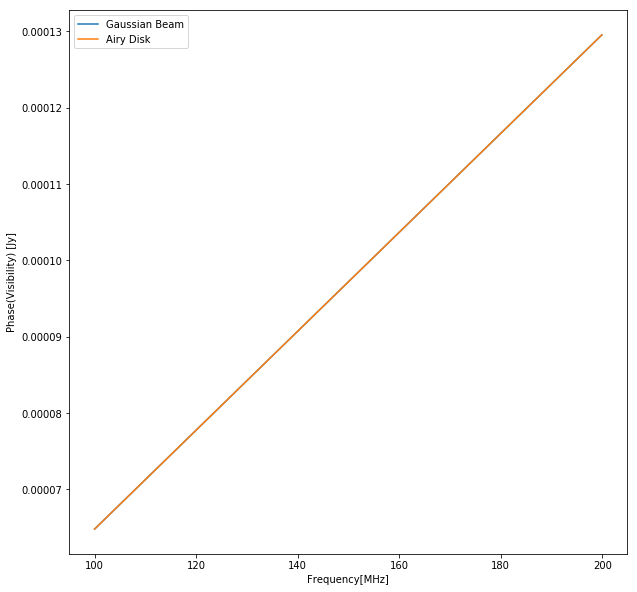

In [21]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.angle(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.angle(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Phase(Visibility) [Jy]')
plt.legend(loc='best')

$\textbf{Visibility Waterfall}$

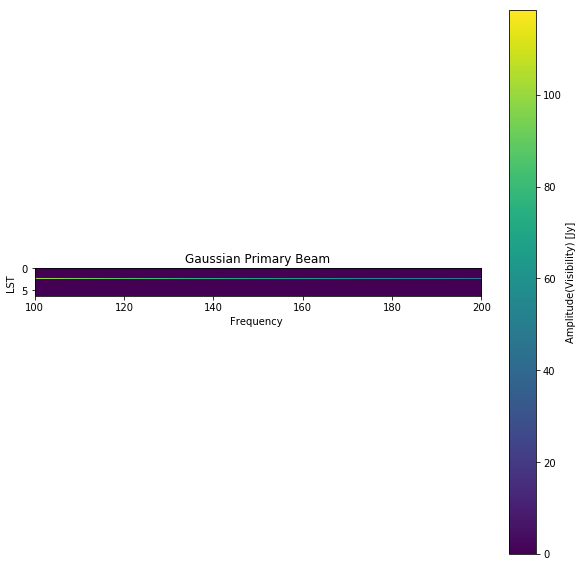

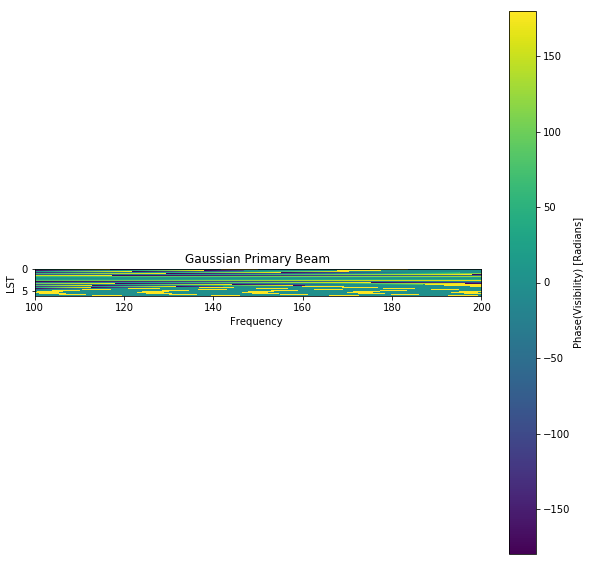

In [22]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.abs(vis_gp),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.angle(vis_gp,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

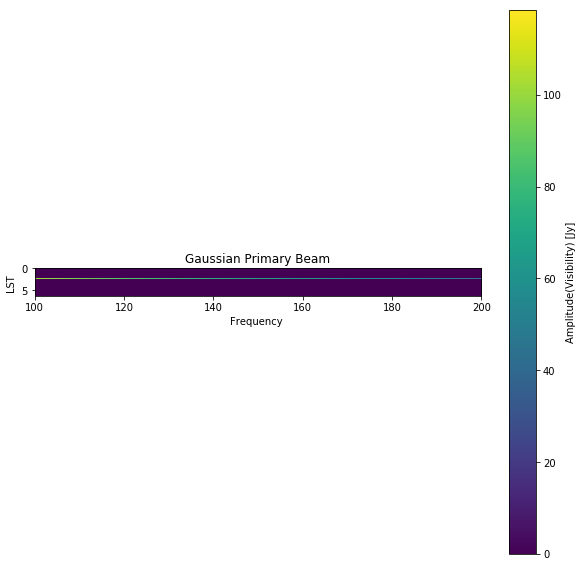

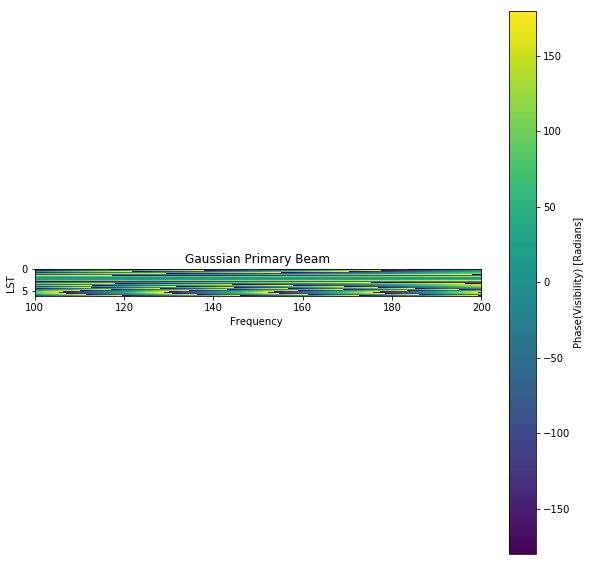

In [23]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.abs(vis_ad),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.angle(vis_ad,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Delay Visibility}$

In [32]:
def get_bandwidth(window_func,frqs,dfreq =1.0):
    "This function compute the bandwidth given the window function as an array, and freqs array where it is sampled"
    
    bandwidth = intg.simps(window_func,frqs,dfreq)
    
    return bandwidth

window = signal.nuttall(freqs.size)


def get_delay_vis(data,window,frqs):
    delay_data=np.fft.ifft(data*window)
    delaydata_shift=np.fft.fftshift(delay_data)
    delays = np.fft.fftfreq(frqs.size,frqs[1]-frqs[0])
    delays = np.fft.fftshift(delays)
    
    return [delays,delaydata_shift]

frq_mid = 150 # Central frequency in MHz
c=3e8
jy2mK = 1e-26*(c/(frq_mid*1e6))**2/(2*CNST1.k)*1e3



ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
bl = np.linalg.norm(ant2_pos-ant1_pos)

def geometric_delay(bl):
    return bl/c

bl= 14.6
g_dl = geometric_delay(bl)



In [ ]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6 -freqs[0]*10**6)
delays = np.fft.fftshift(delays)*10**9

plt.figure(figsize=(10,10))
plt.title('Point Source at Zenith')
plt.plot(delays,np.abs(ddata_gb[133]),label='Gaussian Beam')
plt.plot(delays,np.abs(ddata_ad[133]),label='Airy Disk')
plt.axvline(g_dl*10**9,ls='dashed',color='black')
plt.axvline(-g_dl*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


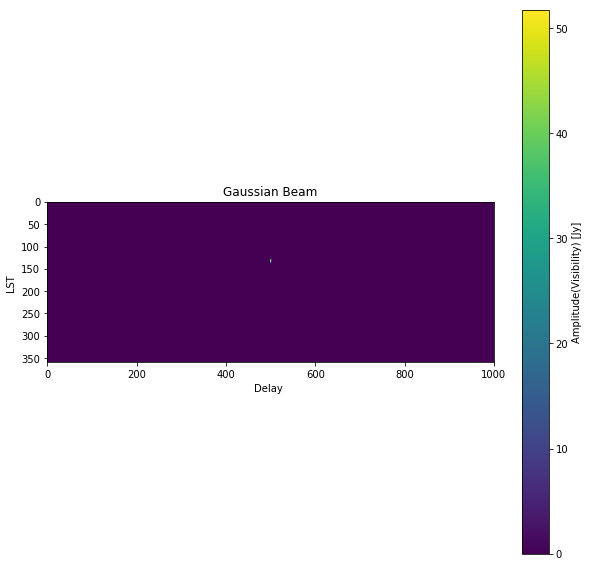

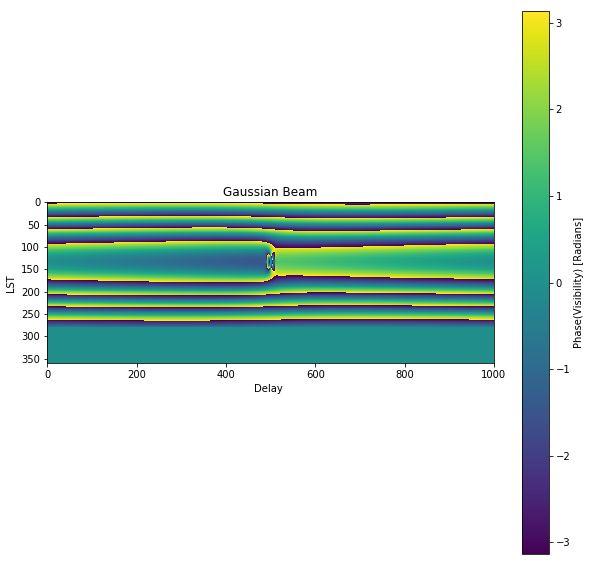

In [28]:

delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
extent =[delays[0],delays[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.abs(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.angle(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()


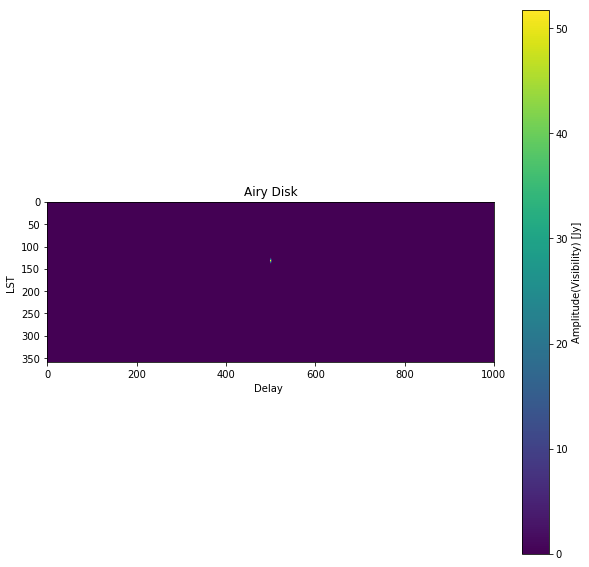

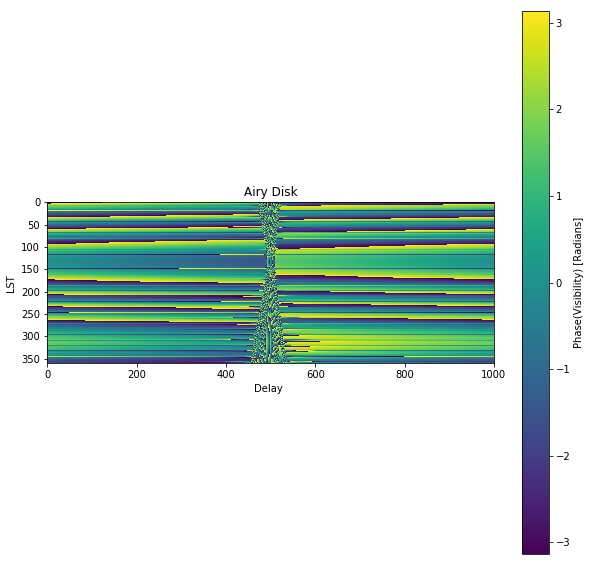

In [29]:

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Visibility Simulation for Multi-Point Source}$

In [21]:
lsts = np.arange(0.0,2.0*np.pi,np.deg2rad(1.0))
freqs = np.arange(100.0,200.0,0.1)


ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
d_block =0.0
#parametized airydisk

a_x = 7.0 #np.random.normal(6.0,0.01)
a_y = 7.0 #np.random.normal(6.0,0.01)



d_diam = 14.0 
ant1_theta_error,ant1_phi_error, ant2_theta_error,ant2_phi_error,Ant1_beam_size_error,Ant2_beam_size_error = 0.0,0.0,0.0,0.0,0.0,0.0

In [25]:
vis_gp =np.zeros((lsts.size,freqs.size),dtype='complex')
vis_ad =np.zeros((lsts.size,freqs.size),dtype='complex')

for lst_i in range(lsts.size):
            #star hour angle
            ra=[lsts[lst_i] -RA[src_i] for src_i in range(RA.size)]
            
            src_pos_lmn = [pos_lmn(ra[src_i],DEC[src_i],np.deg2rad(RA_0),np.deg2rad(DEC_0)) for src_i in range(len(ra))]
            
            
            #transforming antenna position from ENU to equatorial system XYZ
            lat = np.deg2rad(DEC_0)
            xyz_1,xyz_2 = XYZ_trans_mat(ant1_pos,lat)[0],XYZ_trans_mat(ant2_pos,lat)[0]
            
            #computing the baseline
            bl_xyz = xyz_2 - xyz_1

            #compute the visibility for all frequency
            vis_freq_gp = np.zeros(freqs.size,dtype ='complex')
            vis_freq_ad = np.zeros(freqs.size,dtype ='complex')
            
            for freq_i in range(freqs.size):
                lambda_ = (3e8)/(freqs[freq_i]*10**6)
                sigma_fwhm = sigma_func(d_diam,freqs[freq_i]*10**6)
                
                vis_freq_gp[freq_i]= np.sum([flux_func(freqs[freq_i],data_bestfit[src_i][0], data_bestfit[src_i][1])*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],sigma_fwhm,0.0,0.0,0.0)*gaussian_beam(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],sigma_fwhm,0.0,0.0,0.0)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn[src_i])) for src_i in range(len(src_pos_lmn))])
                vis_freq_ad[freq_i]= np.sum([flux_func(freqs[freq_i],data_bestfit[src_i][0], data_bestfit[src_i][1])*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*param_airydisk(np.deg2rad(DEC_0),np.deg2rad(RA_0),DEC[src_i],ra[src_i],a_x,a_y,d_diam,d_block,freqs[freq_i]*10**6)*np.exp(-1j*2.0*np.pi*np.dot(bl_xyz/lambda_,src_pos_lmn[src_i])) for src_i in range(len(src_pos_lmn))])
            vis_gp[lst_i,:] = vis_freq_gp
            vis_ad[lst_i,:] = vis_freq_ad
                
 


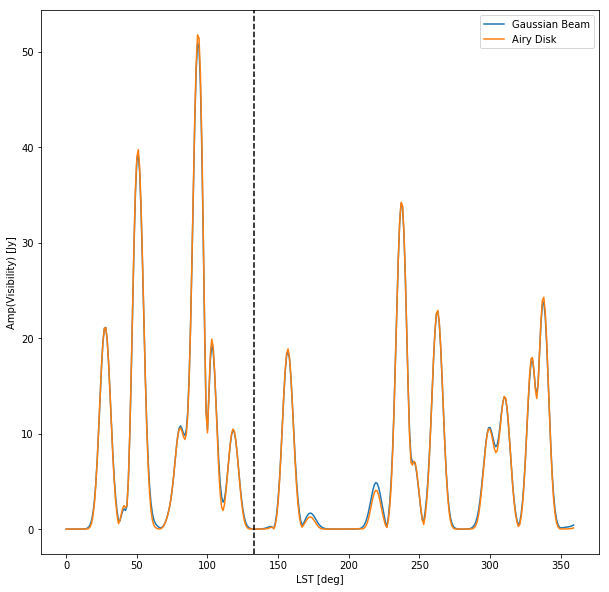

In [26]:

plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.abs(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.abs(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [deg]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')

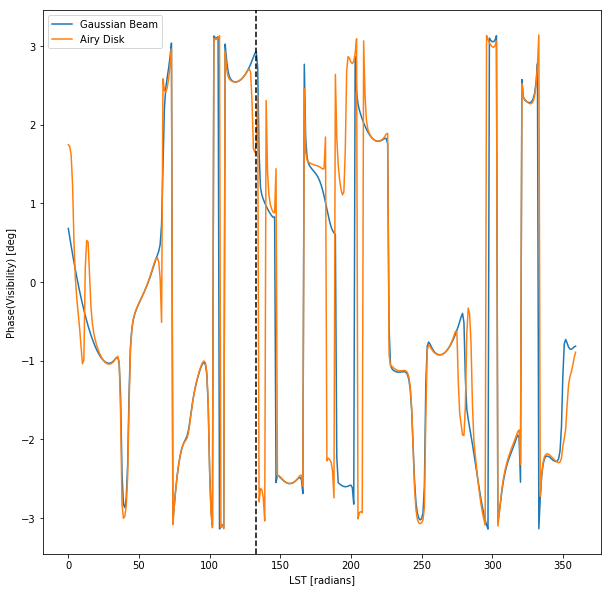

In [27]:
plt.figure(figsize =(10,10))
plt.plot(np.rad2deg(lsts),np.angle(vis_gp[:,1]),label='Gaussian Beam')
plt.plot(np.rad2deg(lsts),np.angle(vis_ad[:,1]),label='Airy Disk')
plt.axvline(np.rad2deg(lsts[133]),ls='dashed',color='black')
plt.xlabel('LST [radians]')
plt.ylabel('Phase(Visibility) [deg]')
plt.legend(loc='best')

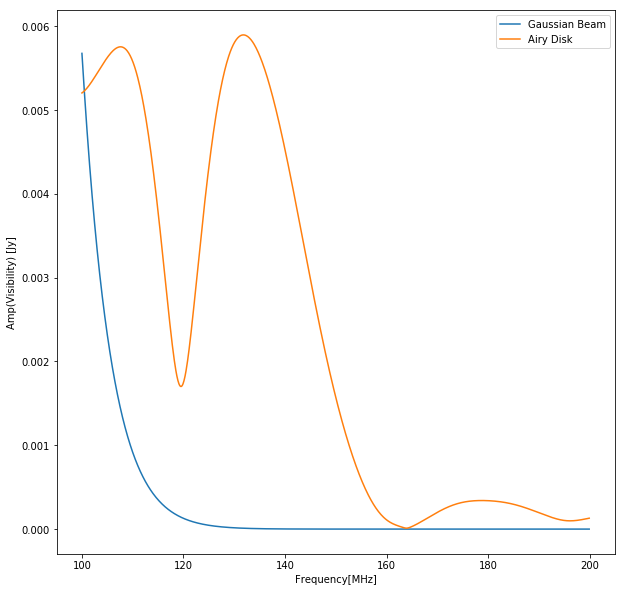

In [28]:
plt.figure(figsize =(10,10))
plt.plot(freqs,np.abs(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.abs(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Amp(Visibility) [Jy]')
plt.legend(loc='best')


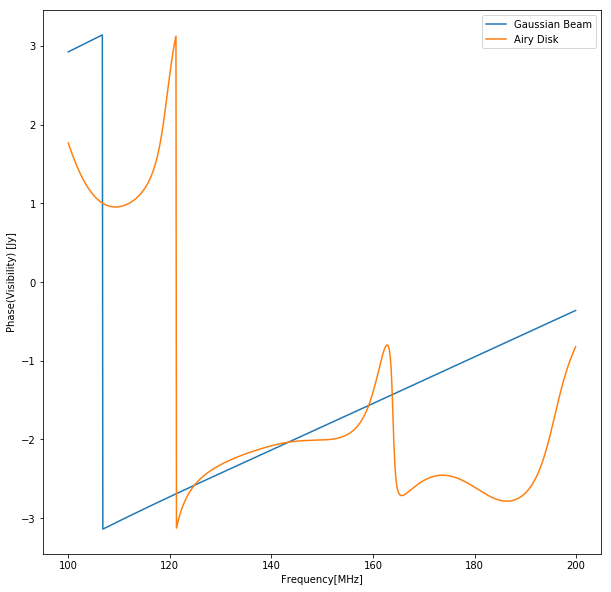

In [29]:

plt.figure(figsize =(10,10))
plt.plot(freqs,np.angle(vis_gp[133]),label='Gaussian Beam')
plt.plot(freqs,np.angle(vis_ad[133]),label='Airy Disk')
plt.xlabel('Frequency[MHz]')
plt.ylabel('Phase(Visibility) [Jy]')
plt.legend(loc='best')

$\textbf{Visibility Waterfall}$

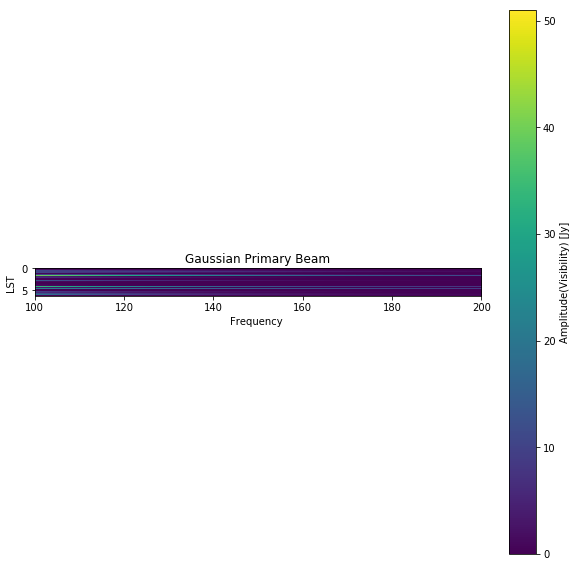

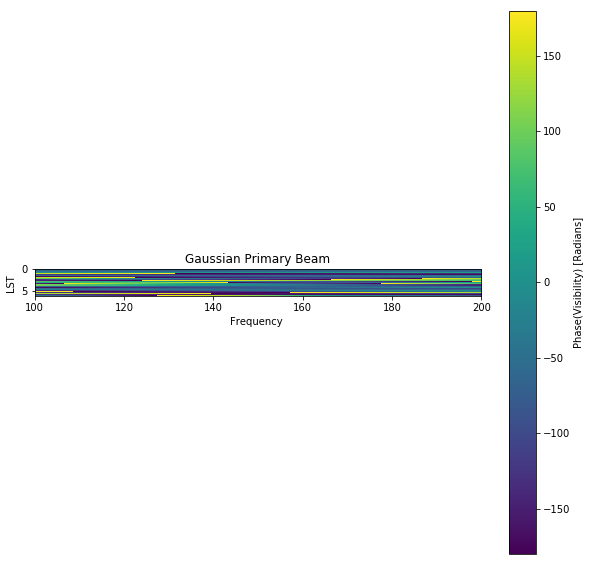

In [30]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.abs(vis_gp),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Primary Beam")
plt.imshow(np.angle(vis_gp,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

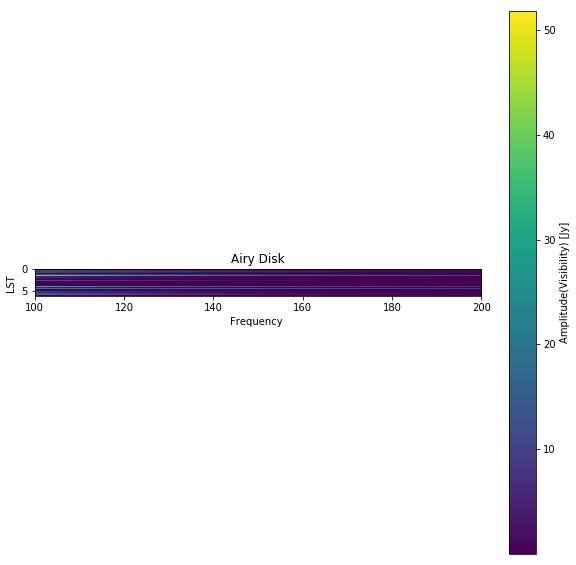

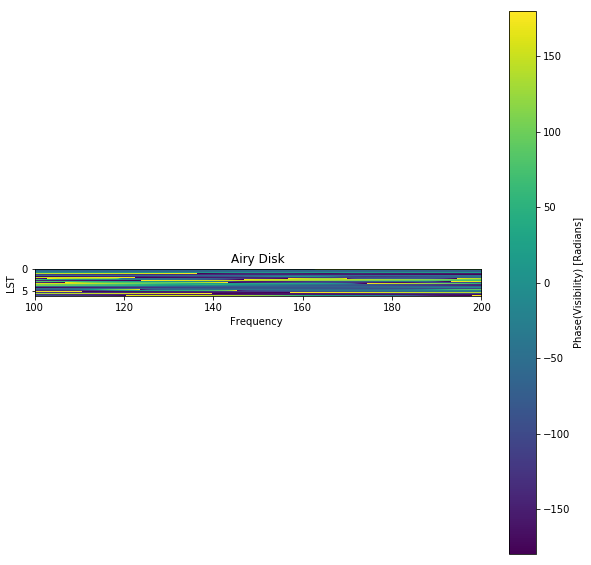

In [38]:
extent =[freqs[0],freqs[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(vis_ad),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(vis_ad,deg='deg'),extent=extent)
plt.xlabel('Frequency ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

$\textbf{Delay Visibility}$

In [40]:
ddata_gb = np.array([get_delay_vis(vis_gp[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_gp.shape[0])])
ddata_ad = np.array([get_delay_vis(vis_ad[lst_i]*jy2mK,window,freqs)[1] for lst_i in range(vis_ad.shape[0])])

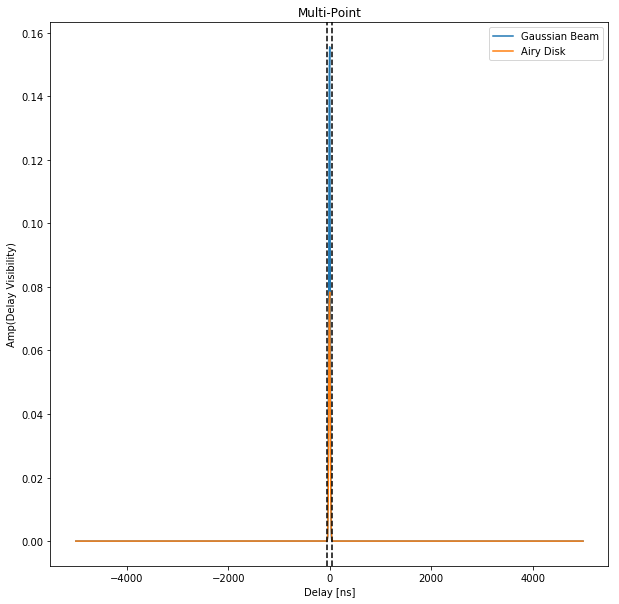

In [56]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6 -freqs[0]*10**6)
delays = np.fft.fftshift(delays)*10**9

plt.figure(figsize=(10,10))
plt.title('Multi-Point')
plt.plot(delays,np.abs(ddata_gb[40]),label='Gaussian Beam')
plt.plot(delays,np.abs(ddata_ad[40]),label='Airy Disk')
plt.axvline(g_dl*10**9,ls='dashed',color='black')
plt.axvline(-g_dl*10**9,ls='dashed',color='black')
plt.xlabel('Delay [ns]')
plt.ylabel('Amp(Delay Visibility)')
plt.legend(loc='best')


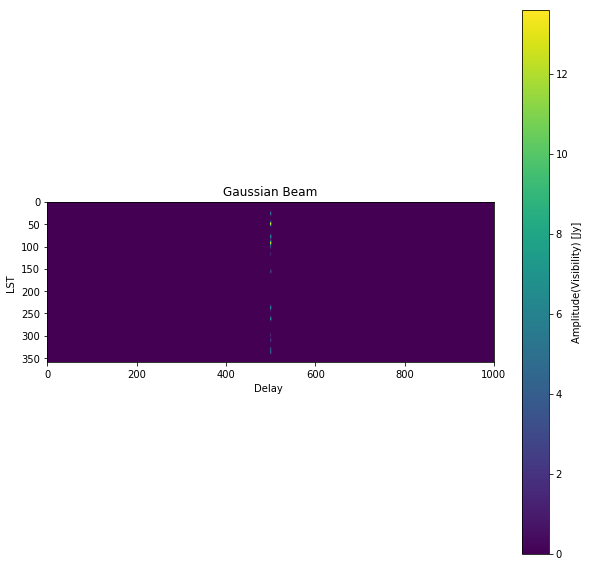

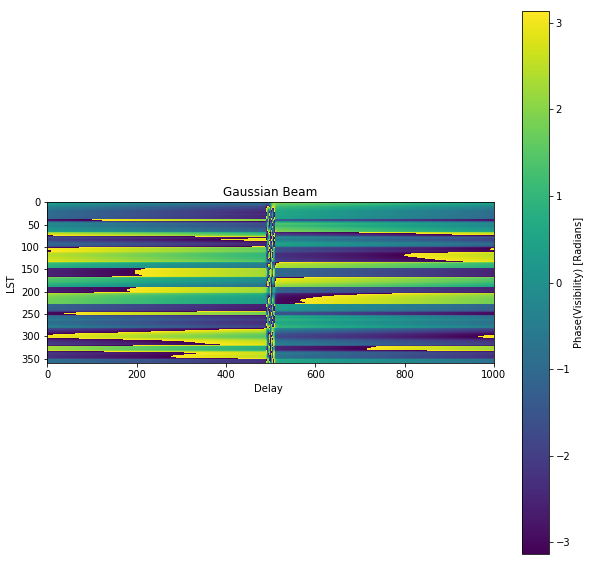

In [57]:
delays = np.fft.fftfreq(freqs.size,freqs[1]*10**6-freqs[0]*10**6)
delays = np.fft.fftshift(delays)
extent =[delays[0],delays[-1],lsts[-1],lsts[0]]

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.abs(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.angle(ddata_gb))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()



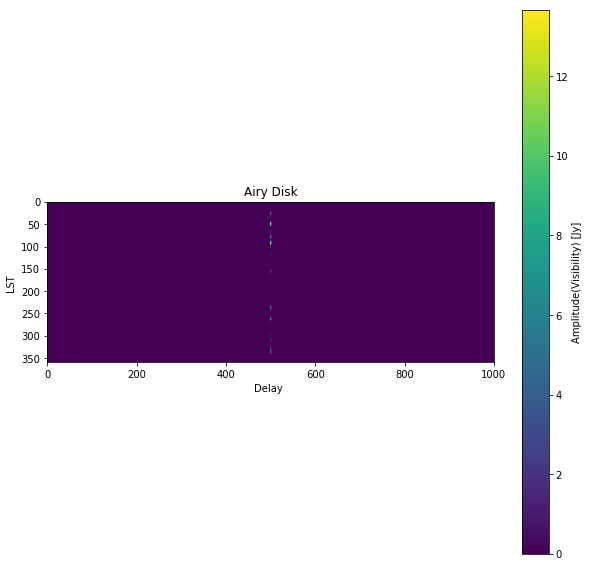

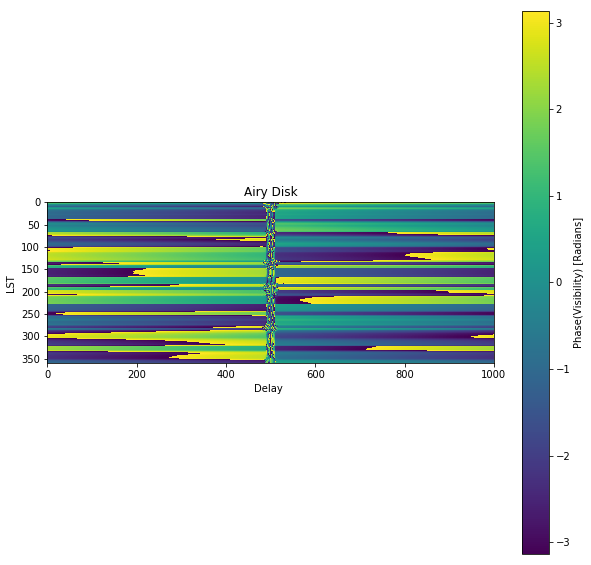

In [58]:
plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(ddata_ad))
#plt.axvline(g_dl,ls='dashed',color='white')
#plt.axvline(-g_dl,ls='dashed',color='white')
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()

5